# Data Cleaning


In [44]:
#Import Libraries
import pandas as pd 
import os 
import csv 
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [45]:
# 1. Create a DataFrame for the Emission data
emissions_data_df=pd.read_csv('https://dataanalyticsproject.s3.us-east-2.amazonaws.com/Merged_M5000.csv',index_col=[0])
emissions_data_df

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year,Population,Emission
21795,5000,World,5058,Enteric Fermentation,7225,Emissions (CH4),1990,5327231.061,8.905969e+04
21796,5000,World,5058,Enteric Fermentation,724413,Emissions (CO2eq) from CH4 (AR5),1990,5327231.061,2.493671e+06
21797,5000,World,5058,Enteric Fermentation,723113,Emissions (CO2eq) (AR5),1990,5327231.061,2.493671e+06
21798,5000,World,5059,Manure Management,7225,Emissions (CH4),1990,5327231.061,9.261077e+03
21799,5000,World,5059,Manure Management,7230,Emissions (N2O),1990,5327231.061,4.550201e+02
...,...,...,...,...,...,...,...,...,...
848790,5817,Net Food Importing Developing Countries,6516,Land Use change,7230,Emissions (N2O),2019,1625925.224,1.511440e+02
848791,5817,Net Food Importing Developing Countries,6516,Land Use change,7273,Emissions (CO2),2019,1625925.224,1.310555e+06
848792,5817,Net Food Importing Developing Countries,6516,Land Use change,724413,Emissions (CO2eq) from CH4 (AR5),2019,1625925.224,4.714474e+04
848793,5817,Net Food Importing Developing Countries,6516,Land Use change,724313,Emissions (CO2eq) from N2O (AR5),2019,1625925.224,4.005316e+04


In [46]:
# 2. Check the datatypes of your columns. 
emissions_data_df.dtypes

Area_Code         int64
Area             object
Item_Code         int64
Item             object
Element_Code      int64
Element          object
Year              int64
Population      float64
Emission        float64
dtype: object

In [49]:
emissions_world_df = emissions_data_df[emissions_data_df['Element_Code'].isin([7225, 7230, 7273]) &
                                      (emissions_data_df['Year'] > 2010 ) & (emissions_data_df['Emission']>5) ]
                                     
emissions_world_df

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year,Population,Emission
615597,5000,World,5058,Enteric Fermentation,7225,Emissions (CH4),2011,7041194.301,9.518910e+04
615600,5000,World,5059,Manure Management,7225,Emissions (CH4),2011,7041194.301,9.476014e+03
615601,5000,World,5059,Manure Management,7230,Emissions (N2O),2011,7041194.301,4.341755e+02
615605,5000,World,5060,Rice Cultivation,7225,Emissions (CH4),2011,7041194.301,2.444373e+04
615610,5000,World,5061,Synthetic Fertilizers,7230,Emissions (N2O),2011,7041194.301,2.172344e+03
...,...,...,...,...,...,...,...,...,...
848784,5817,Net Food Importing Developing Countries,6996,Farm-gate emissions,7230,Emissions (N2O),2019,1625925.224,1.758378e+03
848785,5817,Net Food Importing Developing Countries,6996,Farm-gate emissions,7273,Emissions (CO2),2019,1625925.224,1.444467e+05
848789,5817,Net Food Importing Developing Countries,6516,Land Use change,7225,Emissions (CH4),2019,1625925.224,1.683741e+03
848790,5817,Net Food Importing Developing Countries,6516,Land Use change,7230,Emissions (N2O),2019,1625925.224,1.511440e+02


In [50]:
emissions_world_df = emissions_world_df.groupby(["Element_Code", "Year"]).sum()["Emission"]
emissions_world_df

Element_Code  Year
7225          2011    2.772889e+06
              2012    2.801809e+06
              2013    2.776667e+06
              2014    2.843608e+06
              2015    2.878774e+06
              2016    2.837972e+06
              2017    2.856467e+06
              2018    2.877173e+06
              2019    2.920402e+06
7230          2011    1.742145e+05
              2012    1.759118e+05
              2013    1.750131e+05
              2014    1.769902e+05
              2015    1.789911e+05
              2016    1.814297e+05
              2017    1.842901e+05
              2018    1.826739e+05
              2019    1.837510e+05
7273          2011    7.306554e+07
              2012    7.316256e+07
              2013    7.339011e+07
              2014    7.710320e+07
              2015    7.698557e+07
              2016    7.194840e+07
              2017    7.147395e+07
              2018    7.359778e+07
              2019    7.605377e+07
Name: Emission, dtype: float64

In [51]:
emissions_world_df = emissions_world_df.reset_index()
emissions_world_df

,Element_Code,Year,Emission
0,7225,2011,2.772889e+06
1,7225,2012,2.801809e+06
2,7225,2013,2.776667e+06
3,7225,2014,2.843608e+06
4,7225,2015,2.878774e+06
5,7225,2016,2.837972e+06
6,7225,2017,2.856467e+06
7,7225,2018,2.877173e+06
8,7225,2019,2.920402e+06
9,7230,2011,1.742145e+05


In [52]:
emissions_world_df = emissions_world_df.sort_values(["Year","Emission"], ascending=False)
emissions_world_df.head(25)

,Element_Code,Year,Emission
26,7273,2019,7.605377e+07
8,7225,2019,2.920402e+06
17,7230,2019,1.837510e+05
25,7273,2018,7.359778e+07
7,7225,2018,2.877173e+06
16,7230,2018,1.826739e+05
24,7273,2017,7.147395e+07
6,7225,2017,2.856467e+06
15,7230,2017,1.842901e+05
23,7273,2016,7.194840e+07


## Linear Regression - Green House Gas Emission 

### Analysis of whole World data for all three Elements (CO2, CH4, N2O) 

In [53]:
#Emission - Item wise total - CO2
emissions_world_element1 =  emissions_world_df[(emissions_world_df["Element_Code"] == 7273)]
emissions_world_element1

,Element_Code,Year,Emission
26,7273,2019,7.605377e+07
25,7273,2018,7.359778e+07
24,7273,2017,7.147395e+07
23,7273,2016,7.194840e+07
22,7273,2015,7.698557e+07
21,7273,2014,7.710320e+07
20,7273,2013,7.339011e+07
19,7273,2012,7.316256e+07
18,7273,2011,7.306554e+07


Global Carbon dioxide(CO2) Emission


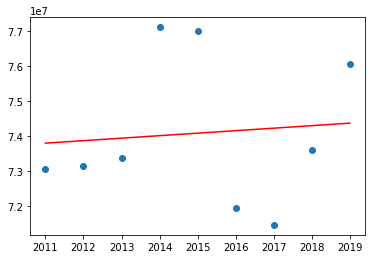

In [54]:
#Linear regression
print("Global Carbon dioxide(CO2) Emission")
X = emissions_world_element1.Year
X = emissions_world_element1.Year.values.reshape(-1, 1)
y = emissions_world_element1.Emission
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [55]:
#Emission - Item wise total - CH4
emissions_world_element2 =  emissions_world_df[(emissions_world_df["Element_Code"] == 7225)]
emissions_world_element2

,Element_Code,Year,Emission
8,7225,2019,2.920402e+06
7,7225,2018,2.877173e+06
6,7225,2017,2.856467e+06
5,7225,2016,2.837972e+06
4,7225,2015,2.878774e+06
3,7225,2014,2.843608e+06
2,7225,2013,2.776667e+06
1,7225,2012,2.801809e+06
0,7225,2011,2.772889e+06


Global Methane(CH4) Emission


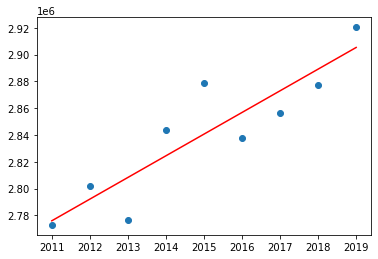

In [57]:
#Linear regression
print("Global Methane(CH4) Emission")
X = emissions_world_element2.Year
X = emissions_world_element2.Year.values.reshape(-1, 1)
y = emissions_world_element2.Emission
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [58]:
#Emission - Item wise total - N2O 
emissions_world_element3 =  emissions_world_df[(emissions_world_df["Element_Code"] == 7230)]
emissions_world_element3

,Element_Code,Year,Emission
17,7230,2019,183750.9669
16,7230,2018,182673.9362
15,7230,2017,184290.1197
14,7230,2016,181429.6926
13,7230,2015,178991.1196
12,7230,2014,176990.2039
11,7230,2013,175013.1257
10,7230,2012,175911.8123
9,7230,2011,174214.5419


Global Nitrous oxide(N20) Emission


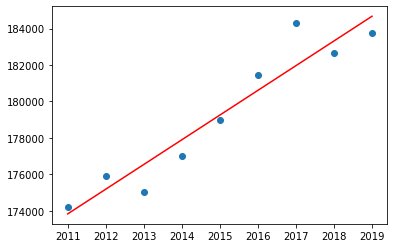

In [59]:
#Linear regression
print("Global Nitrous oxide(N20) Emission")
X = emissions_world_element3.Year
X = emissions_world_element3.Year.values.reshape(-1, 1)
y = emissions_world_element3.Emission
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()